In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno # missing data visualization module for Python
import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [16]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [17]:
df = pd.read_excel('C:/Users/ranji/OneDrive/Desktop/BABI/Capstone/Online Retail II.xlsx', encoding = 'ISO-8859-1')

In [18]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
# Changing the column names
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [20]:
df.head()

,Invoice,stock_code,description,quantity,invoice_date,Price,Customer ID,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Cleaning 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541910 entries, 0 to 541909
Data columns (total 8 columns):
Invoice         541910 non-null object
stock_code      541910 non-null object
description     540456 non-null object
quantity        541910 non-null int64
invoice_date    541910 non-null datetime64[ns]
Price           541910 non-null float64
Customer ID     406830 non-null float64
country         541910 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


In [22]:
# missing values in each column 
df.isnull().sum().sort_values(ascending=False)

Customer ID     135080
description       1454
country              0
Price                0
invoice_date         0
quantity             0
stock_code           0
Invoice              0
dtype: int64

In [23]:
# rows with missing values
df[df.isnull().any(axis=1)].head()

,Invoice,stock_code,description,quantity,invoice_date,Price,Customer ID,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [24]:
# change the invoice_date format - String to Timestamp format
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

In [25]:
# change description - UPPER case to LOWER case
df['description'] = df.description.str.lower()

In [26]:
df.head()

,Invoice,stock_code,description,quantity,invoice_date,Price,Customer ID,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [27]:
# df_new without missing values
df_new = df.dropna()

In [28]:
# missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

country         0
Customer ID     0
Price           0
invoice_date    0
quantity        0
description     0
stock_code      0
Invoice         0
dtype: int64

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
Invoice         406830 non-null object
stock_code      406830 non-null object
description     406830 non-null object
quantity        406830 non-null int64
invoice_date    406830 non-null datetime64[ns]
Price           406830 non-null float64
Customer ID     406830 non-null float64
country         406830 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [31]:
df_new['Customer ID'] = df_new['Customer ID'].astype('int64')

In [32]:
df_new.head()

,Invoice,stock_code,description,quantity,invoice_date,Price,Customer ID,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
Invoice         406830 non-null object
stock_code      406830 non-null object
description     406830 non-null object
quantity        406830 non-null int64
invoice_date    406830 non-null datetime64[ns]
Price           406830 non-null float64
Customer ID     406830 non-null int64
country         406830 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [34]:
df_new.describe().round(2)

,quantity,Price,Customer ID
count,406830.00,406830.00,406830.00
mean,12.06,3.46,15287.68
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


## Remove Quantity with negative values

In [35]:
df_new = df_new[df_new.quantity > 0]

In [36]:
df_new.describe().round(2)

,quantity,Price,Customer ID
count,397925.00,397925.00,397925.00
mean,13.02,3.12,15294.31
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


## Add the column - amount_spent

In [38]:
df_new['amount_spent'] = df_new['quantity'] * df_new['Price']

In [41]:
# rearrange all the columns for easy reference
df_new = df_new[['Invoice','invoice_date','stock_code','description','quantity','Price','amount_spent','Customer ID','country']]

## Add the columns - Month, Day and Hour for the invoice

In [42]:
df_new.insert(loc=2, column='year_month', value=df_new['invoice_date'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='day', value=(df_new.invoice_date.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.invoice_date.dt.hour)

In [43]:
df_new.head()

,Invoice,invoice_date,year_month,month,day,hour,stock_code,description,quantity,Price,amount_spent,Customer ID,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


# Exploratory Data Analysis (EDA)

In [47]:
df_new.groupby(by=['Customer ID','country'], as_index=False)['Invoice'].count().head()

,Customer ID,country,Invoice
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


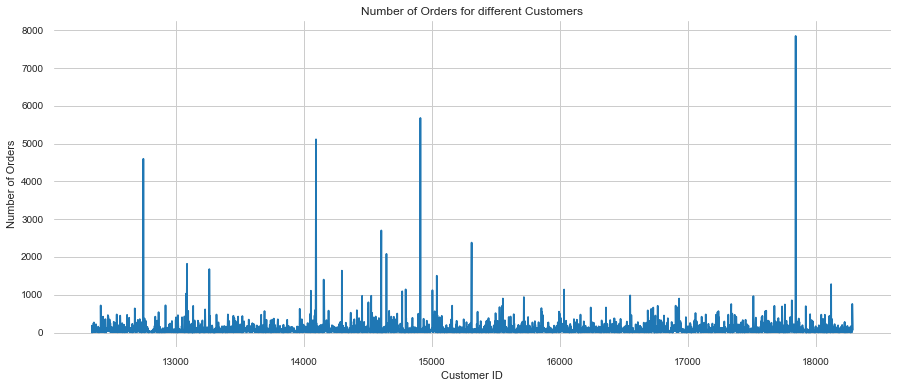

In [66]:
orders = df_new.groupby(by=['Customer ID','country'], as_index=False)['Invoice'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders['Customer ID'], orders.Invoice)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

### Check TOP 5 most number of orders

In [67]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='Invoice', ascending=False).head()

The TOP 5 customers with most number of orders...


,Customer ID,country,Invoice
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


## How much money spent by the customers?

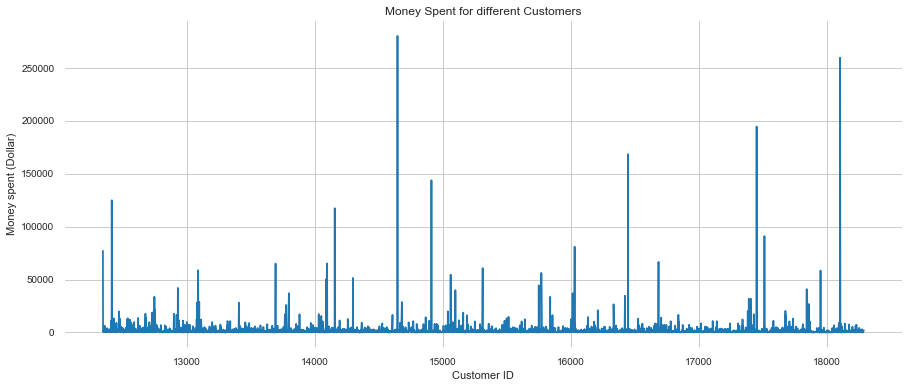

In [69]:
money_spent = df_new.groupby(by=['Customer ID','country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent['Customer ID'], money_spent.amount_spent)
plt.xlabel('Customer ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

### Check TOP 5 highest money spent

In [70]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,Customer ID,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


# Discover patterns for Number of Orders

## How many orders (per month)?

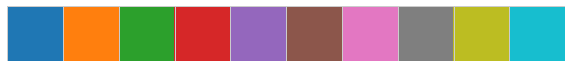

In [71]:
# color available
sns.palplot(color)

In [72]:
df_new.head()

,Invoice,invoice_date,year_month,month,day,hour,stock_code,description,quantity,Price,amount_spent,Customer ID,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


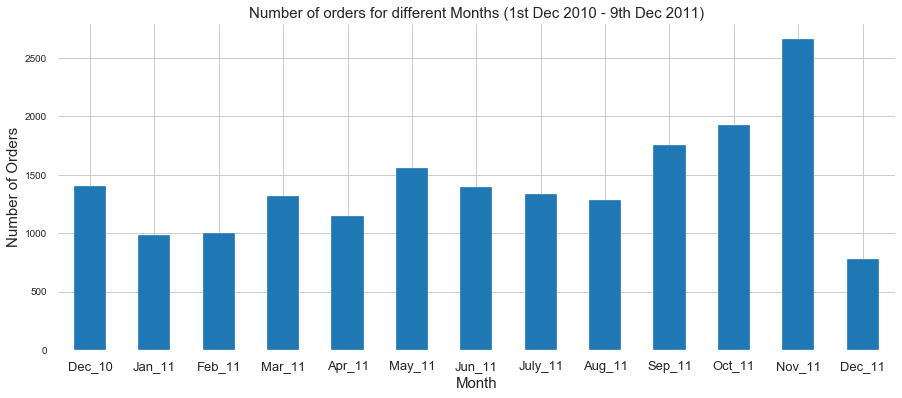

In [74]:
ax = df_new.groupby('Invoice')['year_month'].unique().value_counts().sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

## How many orders (per day)?

In [77]:
df_new.groupby('Invoice')['day'].unique().value_counts().sort_index()

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: day, dtype: int64

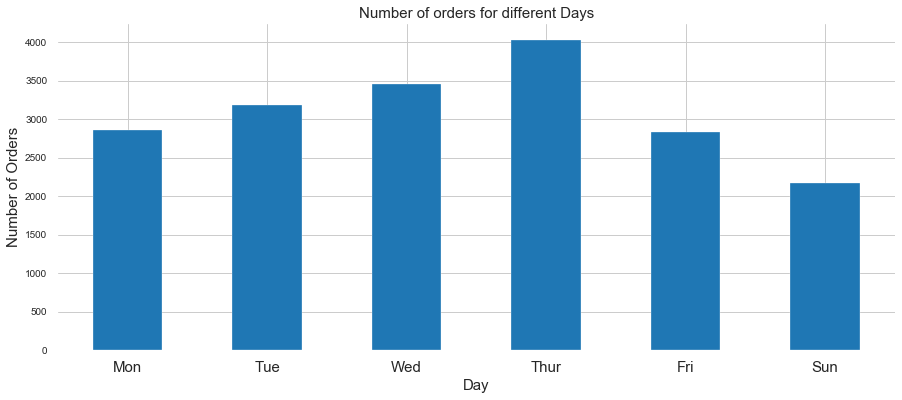

In [79]:
ax = df_new.groupby('Invoice')['day'].unique().value_counts().sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

 ## How many orders (per hour)?


In [80]:
df_new.groupby('Invoice')['hour'].unique().value_counts().iloc[:-1].sort_index()

[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: hour, dtype: int64

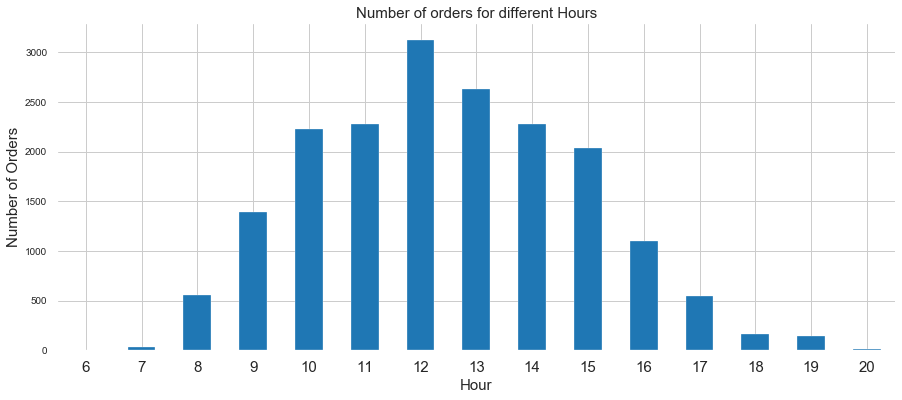

In [82]:
ax = df_new.groupby('Invoice')['hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

# Discover patterns for Unit Price

In [84]:
df_new.Price.describe()

count    397925.000000
mean          3.116212
std          22.096773
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: Price, dtype: float64

**We see that there are unit price = 0 (FREE items)**

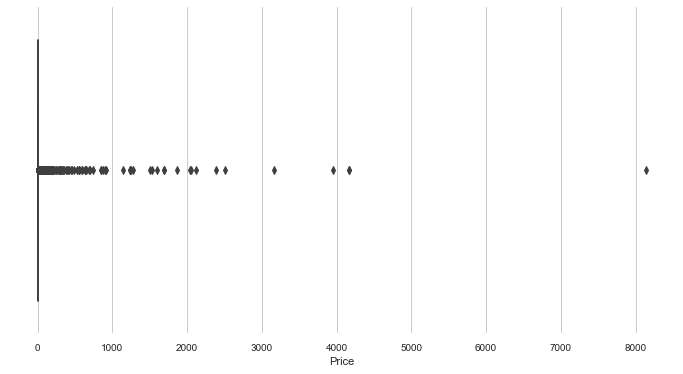

In [86]:
# Distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.Price)
plt.show()

In [88]:
df_free = df_new[df_new.Price == 0]

In [89]:
df_free.head()

,Invoice,invoice_date,year_month,month,day,hour,stock_code,description,quantity,Price,amount_spent,Customer ID,country
9302,537197,2010-12-05 14:02:00,201012,12,7,14,22841,round cake tin vintage green,1,0.0,0.0,12647,Germany
33576,539263,2010-12-16 14:36:00,201012,12,4,14,22580,advent calendar gingham sack,4,0.0,0.0,16560,United Kingdom
40089,539722,2010-12-21 13:45:00,201012,12,2,13,22423,regency cakestand 3 tier,10,0.0,0.0,14911,EIRE
47068,540372,2011-01-06 16:41:00,201101,1,4,16,22090,paper bunting retrospot,24,0.0,0.0,13081,United Kingdom
47070,540372,2011-01-06 16:41:00,201101,1,4,16,22553,plasters in tin skulls,24,0.0,0.0,13081,United Kingdom


In [90]:
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

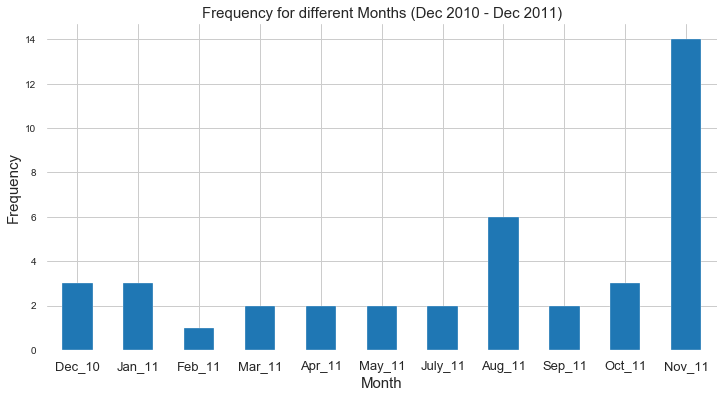

In [91]:
ax = df_free.year_month.value_counts().sort_index().plot('bar',figsize=(12,6), color=color[0])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

**On average, the company gave out 2-4 times FREE items to customers each month (Except in June 2011)**

# Discover patterns for each Country

In [92]:
df_new.head()

,Invoice,invoice_date,year_month,month,day,hour,stock_code,description,quantity,Price,amount_spent,Customer ID,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


## How many orders for each country?

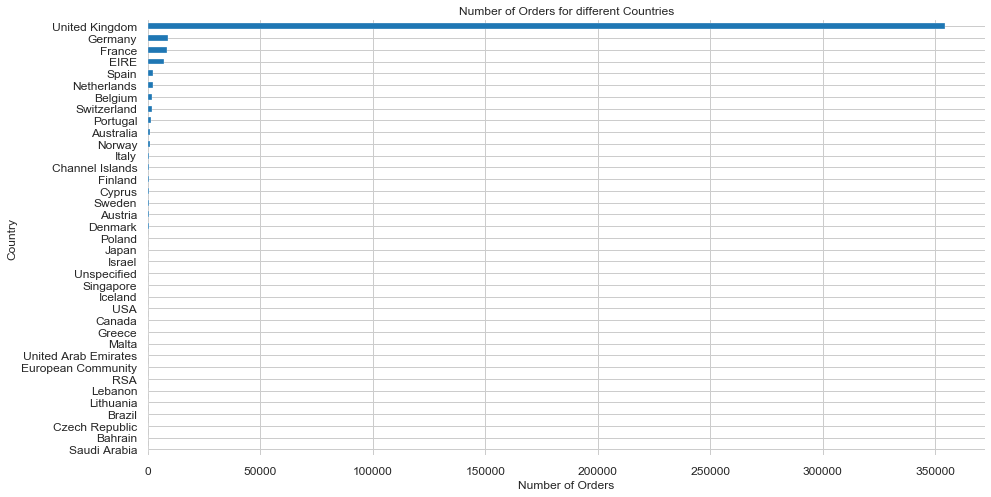

In [94]:
group_country_orders = df_new.groupby('country')['Invoice'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

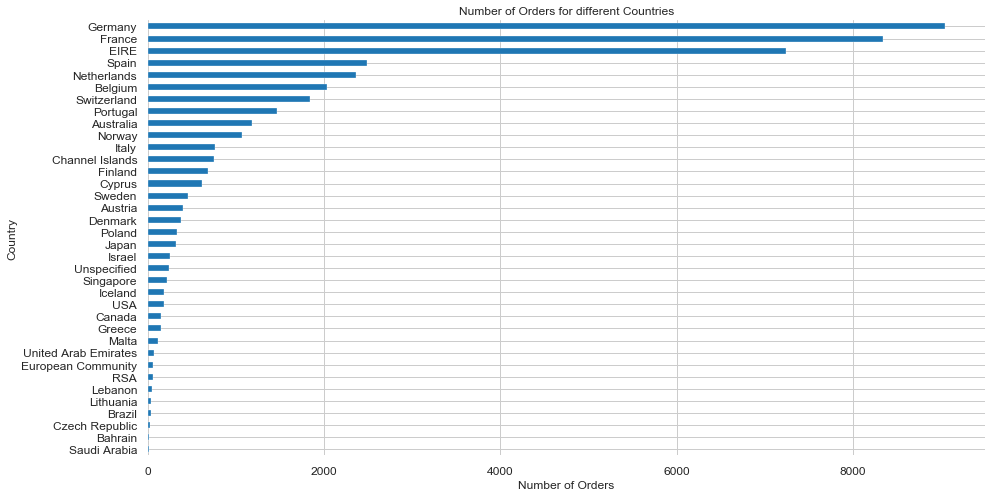

In [95]:
group_country_orders = df_new.groupby('country')['Invoice'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

## How much money spent by each country?

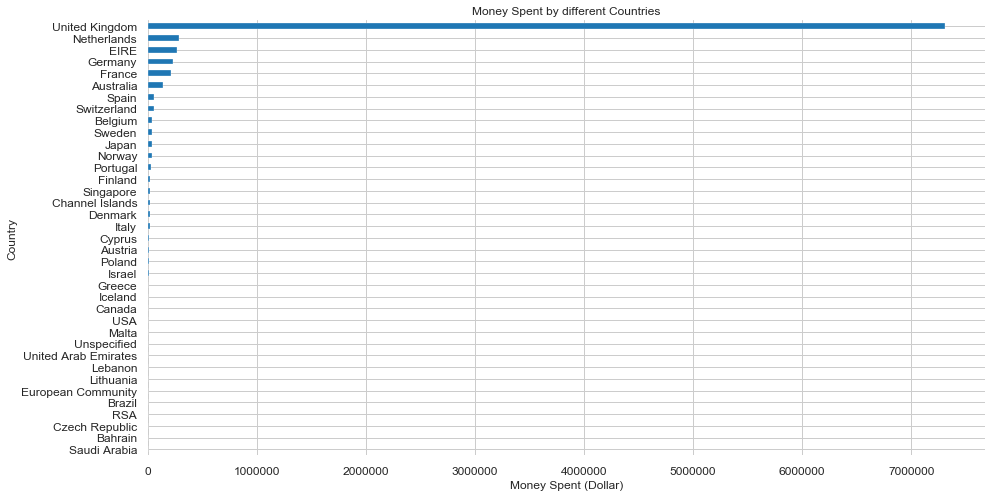

In [96]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

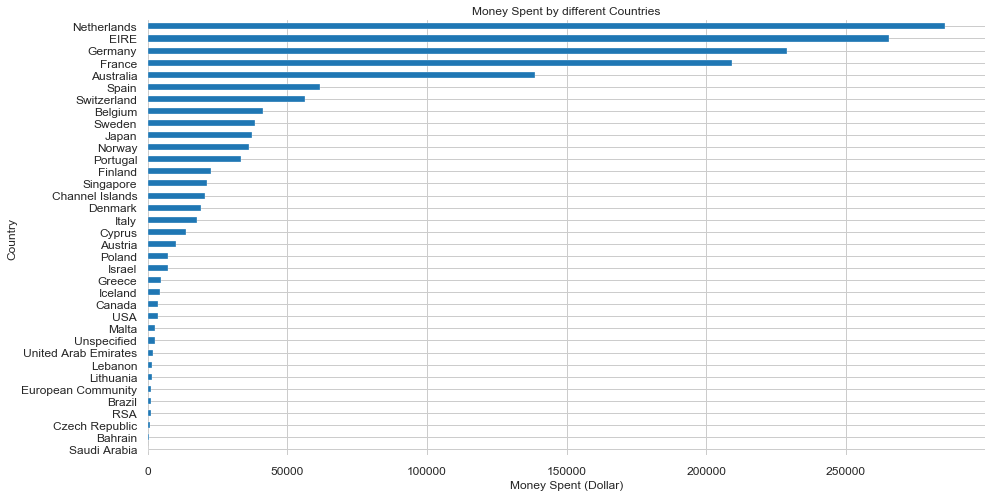

In [97]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()